In [90]:
#load all necessaries files 
import time
init_time = time.time()
import numpy as np
from functions import ClusterMerits, AuxiliarFunctions
from sklearn.cluster import KMeans
from numpy import linalg as LA
from keras.utils import np_utils
from sklearn import preprocessing


path = "/home/micael/MyWorkspace/DATA"

signal = np.load(path+"/"+"lvbb125Matrix.npy")[0:5000,:]
signal_noPtRel = np.delete(signal,[11,23],1)

trgt_signal = np.ones(signal.shape[0])

signal_scaled = preprocessing.scale(signal)
signal_scaled_noPtRel = preprocessing.scale(signal_noPtRel)

#ZZ = np.load(path+"/"+"ZZMatrix.npy")[0:5000,:]
TTbar = np.load(path+"/"+"TTbarMatrix.npy")[0:5000,:]
TTbar_noPtRel = np.delete(TTbar,[11,23],1)

trgt_TTbar = 0.0*np.ones(TTbar.shape[0])

TTbar_scaled = preprocessing.scale(TTbar)
TTbar_scaled_noPtRel = preprocessing.scale(TTbar_noPtRel)

bkg = TTbar
#bkg = np.append(ZZ,TTbar,axis=0)
all_data = np.append(signal,bkg,axis=0)
all_data_noPtRel = np.append(signal_noPtRel,TTbar_noPtRel,axis=0)
trgt = np.append(trgt_signal,trgt_TTbar,axis=0)

all_data_scaled = preprocessing.scale(all_data)
all_data_scaled_noPtRel = preprocessing.scale(all_data_noPtRel)
sparse_trgt = np_utils.to_categorical(trgt)

current_time = time.time()
print all_data_noPtRel.shape
print signal_noPtRel.shape
print 'Time to load all files: %1.3f seconds'%(current_time-init_time)

(10000, 22)
(5000, 22)
Time to load all files: 0.051 seconds


In [25]:
all_data_scaled

array([[-0.72637361, -0.86169269, -1.01145189, ...,  0.98297662,
         0.17218639,  0.364192  ],
       [-0.74625614, -0.86137813, -1.17447994, ...,  0.69160388,
         0.74025251, -0.08467736],
       [-0.74838742, -0.86661748, -1.24108544, ...,  0.67330108,
         0.64998491,  0.44231052],
       ..., 
       [ 4.61461569, -0.86232914,  0.56071509, ...,  0.83744079,
         2.99373806, -0.23248309],
       [ 0.53753147, -0.86232914,  0.05119985, ...,  0.64131162,
        -0.64720438, -0.38591624],
       [-0.66408289,  0.55868975,  0.4056379 , ..., -0.35145298,
        -0.40091893,  0.61876238]])

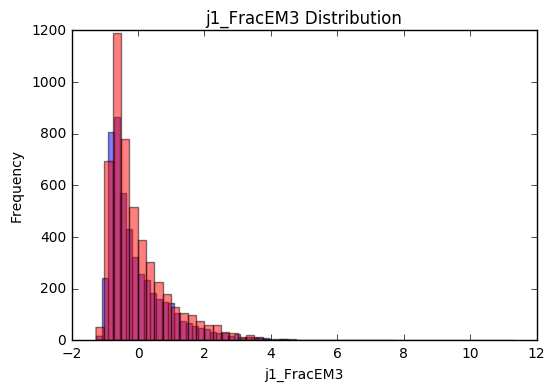

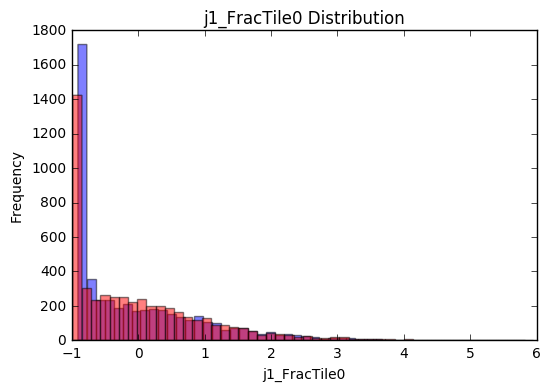

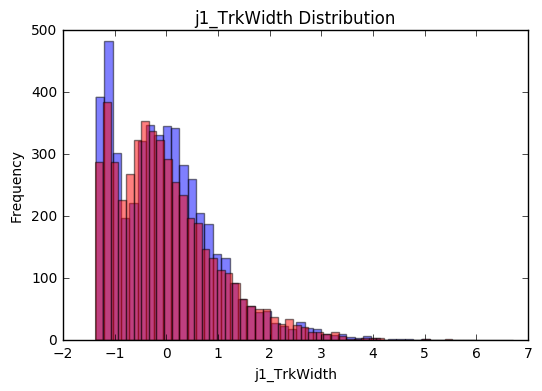

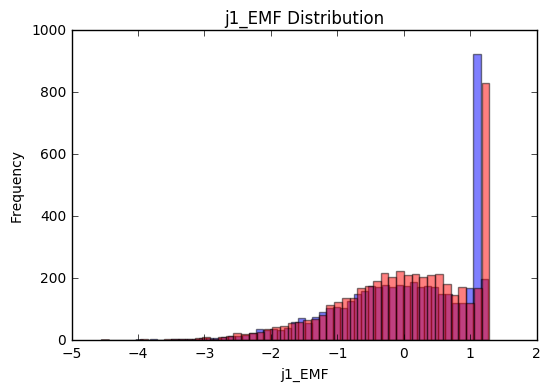

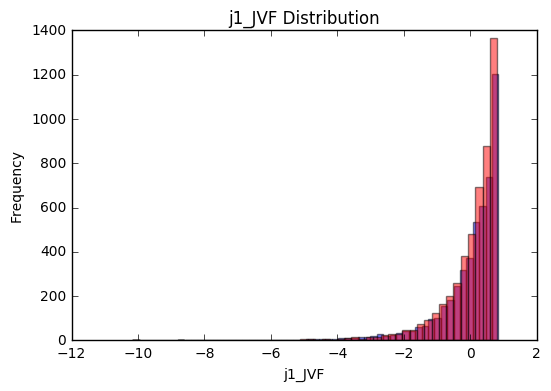

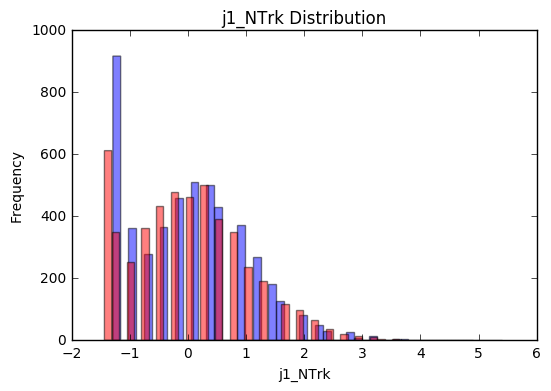

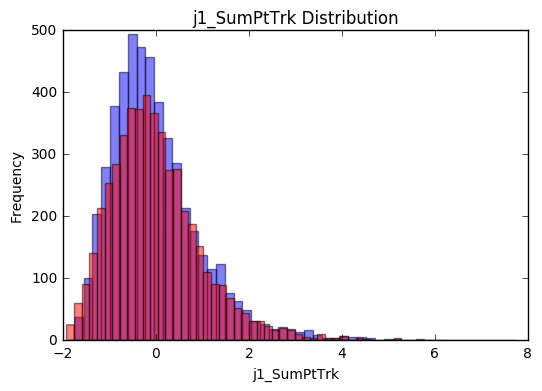

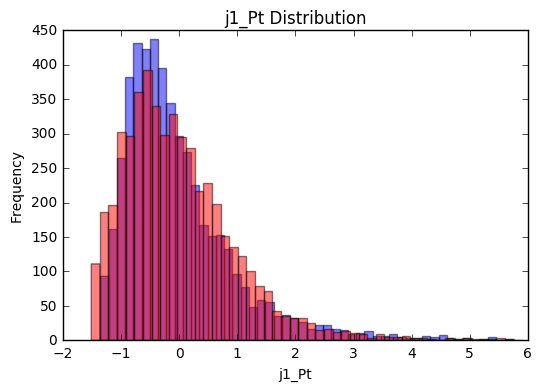

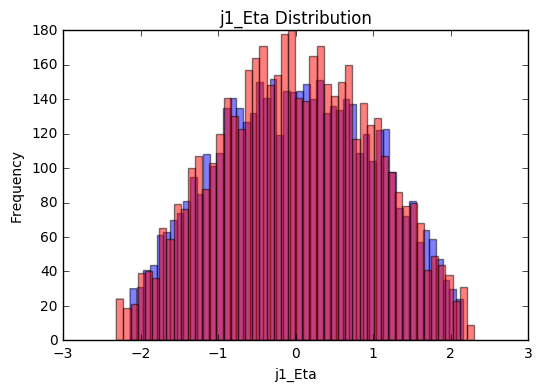

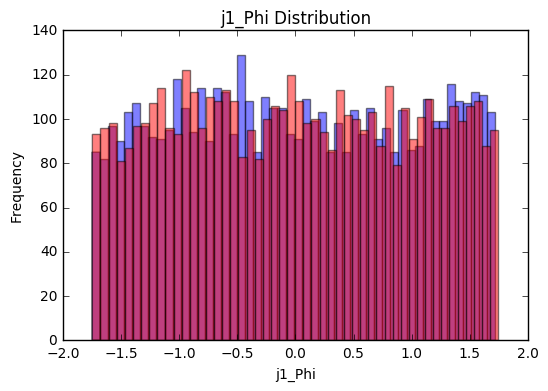

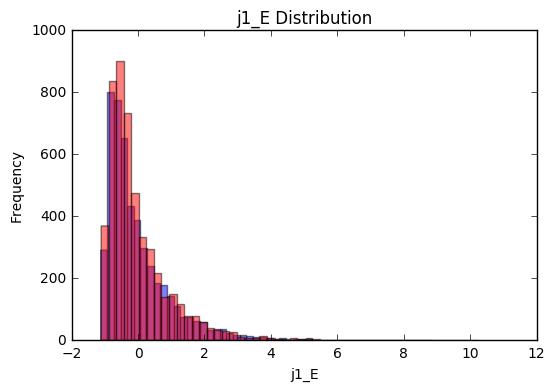

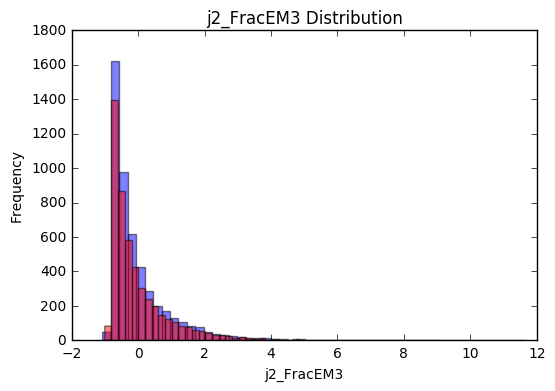

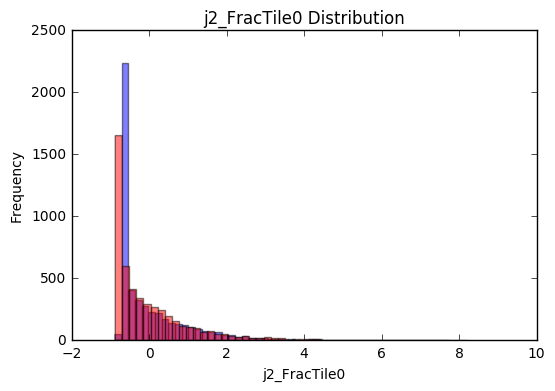

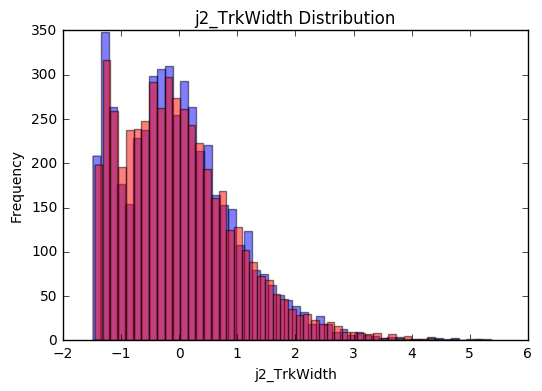

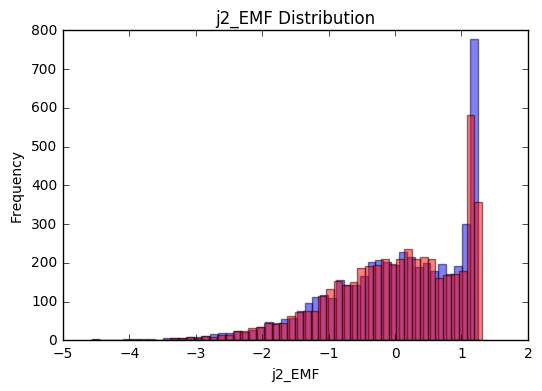

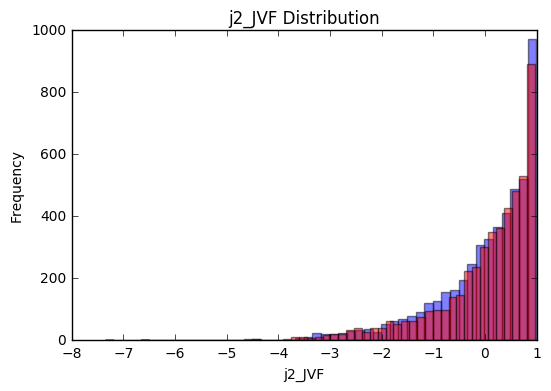

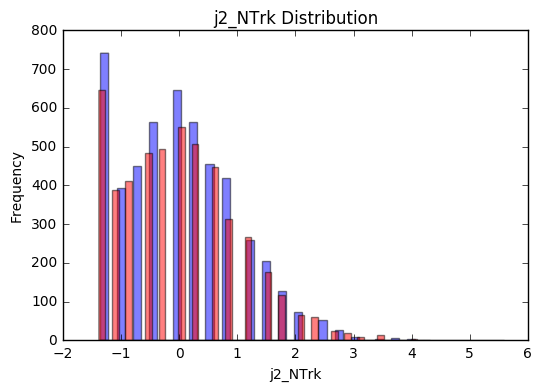

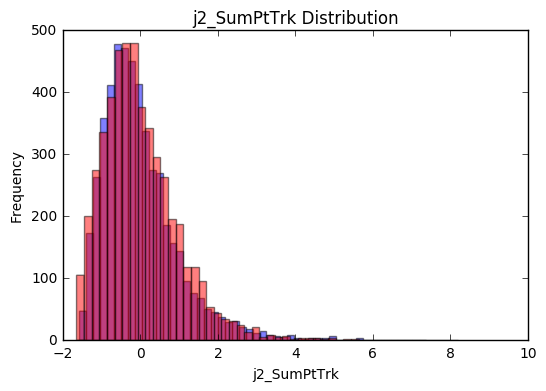

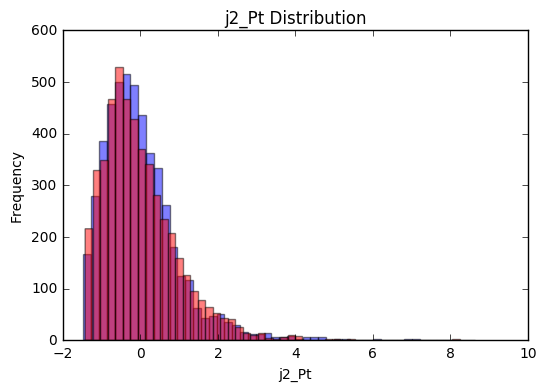

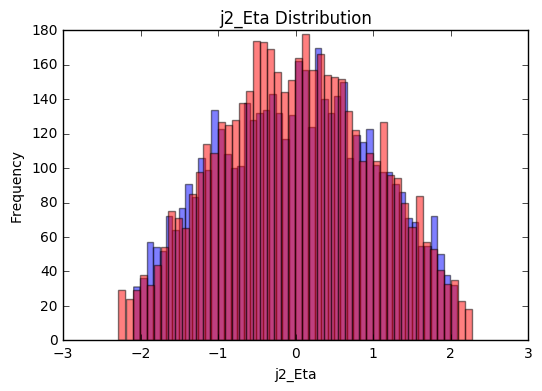

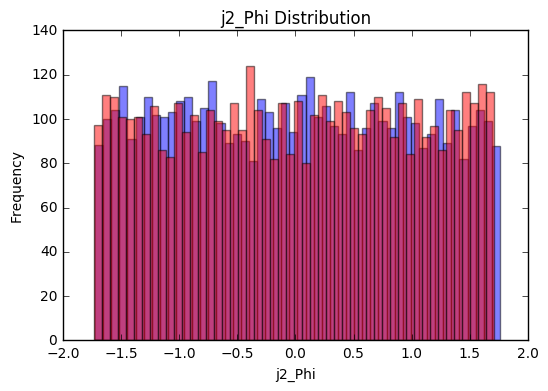

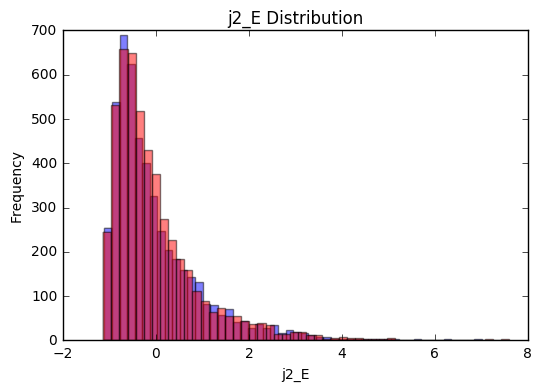

(5000,)
(5000,)


In [75]:
import matplotlib.pyplot as plt

save_plots = '/home/micael/MyWorkspace/DATA/Plots'

variables = "j1_FracEM3,j1_FracTile0,j1_TrkWidth,j1_EMF,j1_JVF,j1_NTrk,j1_SumPtTrk,j1_Pt,j1_Eta,j1_Phi,j1_E,j2_FracEM3,j2_FracTile0,j2_TrkWidth,j2_EMF,j2_JVF,j2_NTrk,j2_SumPtTrk,j2_Pt,j2_Eta,j2_Phi,j2_E"

for variable,i in zip(variables.split(','),range(len(signal[0]))):
    
    #media zero
    #sig_norm = (signal[:,i] - np.full(signal[:,i].shape,np.mean(signal[:,i],axis=0)))/np.std(signal[:,i],axis=0)
    #ttbar_norm = (TTbar[:,i] - np.full(TTbar[:,i].shape,np.mean(TTbar[:,i],axis=0)))/np.std(TTbar[:,i],axis=0)
    signal_scaled = preprocessing.scale(signal_noPtRel)
    TTbar_scaled = preprocessing.scale(TTbar_noPtRel)
    
    plt.hist(signal_scaled[:,i],50,color='b',alpha=0.5)
    plt.hist(TTbar_scaled[:,i],50,color='r',alpha=0.5)
    plt.title(variable+' Distribution')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    #plt.savefig(save_plots+'/'+'normalized_distribution_'+variable+'.pdf')
    plt.show()
print norm_sig.shape
print norm_ttbar.shape

In [5]:
import matplotlib.pyplot as plt
kms = KMeans(n_clusters=2, init='k-means++', n_init=15, max_iter=500, tol=0.001, precompute_distances='auto',
             verbose=0, random_state=None, copy_x=True)
kms.fit(all_data)
#for j in range(all_data.shape[1]):
#    if j == 23:
#        for i in set(kms.labels_):
#            index = kms.labels_ == i
#            plt.plot(all_data[index,j], all_data[index,j-23], 'o')
#        plt.show()
#    else:
#        for i in set(kms.labels_):
#            index = kms.labels_ == i
#            plt.plot(all_data[index,j], all_data[index,j+1], 'o')
#        plt.show()

#zip(all_data, kms.labels_)

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=2, n_init=15,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.001,
    verbose=0)

In [6]:
output = kms.predict(all_data)
cluster_list = []
for i in range(2):
    cluster_list.append(all_data[output==i,:])
print '======================================='
print 'F_0', ClusterMerits.DispTotal(all_data,ClusterMerits.Baricenter(all_data),media='')
print '======================================='
F_in = ClusterMerits.DistIntraClass(cluster_list)
print 'F_in', F_in
F_out = ClusterMerits.DispInterClass(cluster_list,all_data)
print 'F_out', F_out
print '========================================'
print 'F_in + F_out', F_in+F_out

F_0 203658708.105
F_in 121610665.342
F_out 82048042.7624
F_in + F_out 203658708.105


In [15]:
print cluster_list[0].shape
print '==================='
otp1 = kms.predict(signal)
otp2 = kms.predict(TTbar)
print signal[otp1==0,:].shape
print signal[otp1==1,:].shape
print '====================='
print TTbar[otp2==0,:].shape
print TTbar[otp2==1,:].shape

(8042, 24)
(3970, 24)
(1030, 24)
(4072, 24)
(928, 24)


In [27]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=10000, centers=7, n_features=5,
                  random_state=None)

X, y

(array([[ -1.37352699,  -7.74223861,   6.61329012,  -2.77130974,
           4.88095421],
        [ -4.69986639,  -2.52838357,   6.79422979,   3.65531982,
           6.36833356],
        [ -5.70642666,   8.21503219,   4.2224039 ,  -6.35878789,
          -5.33155202],
        ..., 
        [ -0.58981438,  -7.65052051,   6.89984113,  -0.39980222,
           2.67360436],
        [ -6.78106428,   7.70605715,  -8.42032625,  -8.27478127,
          -2.84232957],
        [ -5.81454444,   9.56306771,  -8.77638016, -11.06910822,
          -6.46955573]]), array([0, 1, 6, ..., 0, 5, 5]))

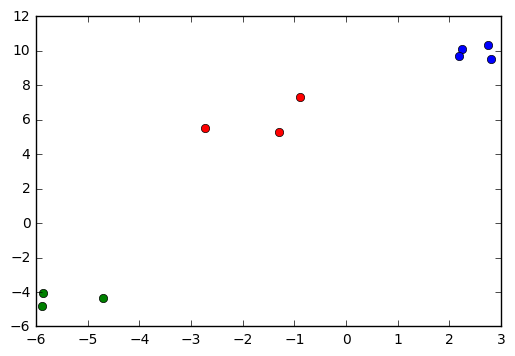

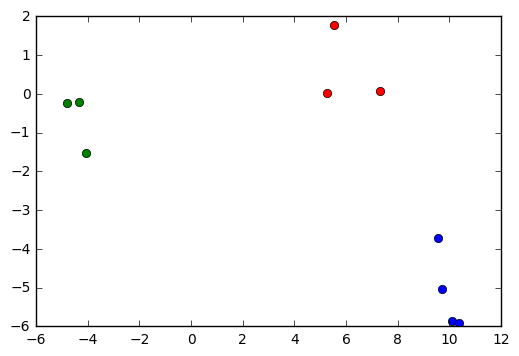

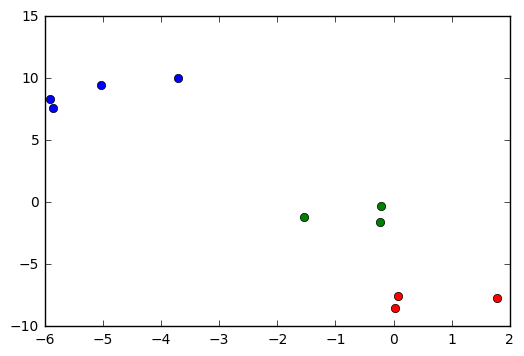

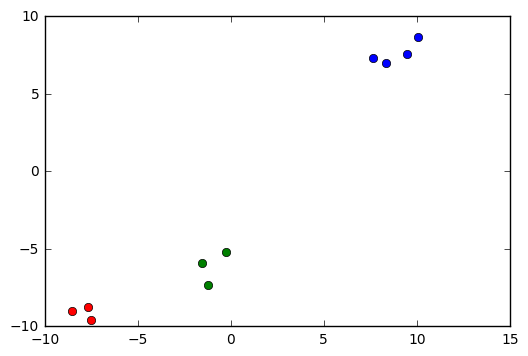

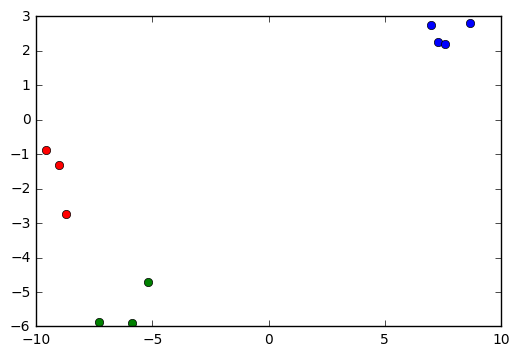

[(array([-4.7042472 , -4.34894932, -0.20919955, -0.25611799, -5.17309643]), 1),
 (array([-2.73202649,  5.53470968,  1.7782047 , -7.68327204, -8.73247153]), 2),
 (array([-0.88275598,  7.3024134 ,  0.07248934, -7.50886698, -9.58945047]), 2),
 (array([  2.2456182 ,  10.1117849 ,  -5.86100174,   7.64062692,   7.2992319 ]),
  0),
 (array([ 2.18929653,  9.71742535, -5.03822367,  9.46504718,  7.58716174]), 0),
 (array([-1.30601477,  5.27765447,  0.02787309, -8.54852304, -9.02193527]), 2),
 (array([  2.74713853,  10.36112133,  -5.90702879,   8.33766806,   6.99334832]),
  0),
 (array([  2.81225039,   9.55345901,  -3.71123904,  10.05220293,   8.67386148]),
  0),
 (array([-5.87132733, -4.06795026, -1.53507566, -1.20840973, -7.31105146]), 1),
 (array([-5.8932366 , -4.81608832, -0.23085273, -1.56373731, -5.87521114]), 1)]

In [63]:
import matplotlib.pyplot as plt
kms = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
             verbose=0, random_state=None, copy_x=True)
kms.fit(X)
for j in range(X.shape[1]):
    if j == 4:
        for i in set(kms.labels_):
            index = kms.labels_ == i
            plt.plot(X[index,j], X[index,j-4], 'o')
        plt.show()
    else:
        for i in set(kms.labels_):
            index = kms.labels_ == i
            plt.plot(X[index,j], X[index,j+1], 'o')
        plt.show()

zip(X, kms.labels_)

In [70]:
# how to access a cluster
output = kms.predict(X)
print kms.cluster_centers_
print '==============================='
print X[output==0,:]
print ClusterMerits.Baricenter(X[output==0,:])

[[ 2.49857592  9.93594765 -5.12937331  8.87388628  7.63840086]
 [-5.48960371 -4.41099596 -0.65837598 -1.00942168 -6.11978634]
 [-1.64026575  6.03825919  0.62618904 -7.91355402 -9.11461909]]
[[  2.2456182   10.1117849   -5.86100174   7.64062692   7.2992319 ]
 [  2.18929653   9.71742535  -5.03822367   9.46504718   7.58716174]
 [  2.74713853  10.36112133  -5.90702879   8.33766806   6.99334832]
 [  2.81225039   9.55345901  -3.71123904  10.05220293   8.67386148]]
[ 2.49857592  9.93594765 -5.12937331  8.87388628  7.63840086]


In [11]:
B = np.array([[1, 2],[3, 4]])
C = np.array([[5, 1],[3, 2]])
D = np.append(B,C,axis=0)
clt = []
clt.append(B)
clt.append(C)

print '==================='
print 'F_0', ClusterMerits.DispTotal(D,ClusterMerits.Baricenter(D),media='')
print '==================='

F_in = ClusterMerits.DistIntraClass(clt)
F_out = ClusterMerits.DispInterClass(clt,D)
print F_out
print 'F_in + F_out', F_in+F_out

F_0 12.75
6.25
F_in + F_out 12.75


In [30]:
from sklearn.svm import SVC
from sklearn import cross_validation

n_folds = 100
n_inits = 2

CVO = cross_validation.StratifiedKFold(y,n_folds)
CVO = list(CVO)

clf = SVC()


for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    clf.fit(X[train_id],y[train_id])
    score = clf.score(X[test_id],y[test_id])
    predi = clf.predict(X[test_id])
    print ('Processing: Fold %i of %i Score %1.3f '%(
                ifold+1, n_folds, 
                score))
    print 'Predict test set =', predi
    print 'true label = ', y[test_id]
    
    print '=================================================='
#clf.fit(X,y)

Processing: Fold 1 of 100 Score 1.000 
Predict test set = [0 1 6 0 5 0 5 1 5 4 6 1 0 6 0 2 6 4 6 1 0 4 0 3 3 2 1 6 3 0 4 6 4 3 4 2 4
 6 4 6 2 0 1 6 0 4 5 0 0 3 6 0 4 2 0 2 2 5 0 3 4 1 6 2 6 6 6 3 1 5 5 5 1 2
 5 3 3 2 5 2 4 4 2 4 1 2 3 2 1 3 4 3 5 2 3 5 1 5 3 5 1 1 3 1 5]
true label =  [0 1 6 0 5 0 5 1 5 4 6 1 0 6 0 2 6 4 6 1 0 4 0 3 3 2 1 6 3 0 4 6 4 3 4 2 4
 6 4 6 2 0 1 6 0 4 5 0 0 3 6 0 4 2 0 2 2 5 0 3 4 1 6 2 6 6 6 3 1 5 5 5 1 2
 5 3 3 2 5 2 4 4 2 4 1 2 3 2 1 3 4 3 5 2 3 5 1 5 3 5 1 1 3 1 5]
Processing: Fold 2 of 100 Score 1.000 
Predict test set = [0 6 0 0 0 6 6 0 6 6 0 0 6 4 0 6 4 0 2 4 4 6 4 6 4 2 4 6 0 6 6 0 2 0 2 3 3
 1 0 5 1 5 6 2 1 2 2 3 6 1 0 3 4 3 1 2 3 4 2 2 4 5 6 3 4 0 1 3 1 5 5 4 5 1
 2 2 5 4 5 4 4 2 1 2 2 3 3 5 3 5 1 1 1 5 5 3 5 3 3 5 3 1 5 1 1]
true label =  [0 6 0 0 0 6 6 0 6 6 0 0 6 4 0 6 4 0 2 4 4 6 4 6 4 2 4 6 0 6 6 0 2 0 2 3 3
 1 0 5 1 5 6 2 1 2 2 3 6 1 0 3 4 3 1 2 3 4 2 2 4 5 6 3 4 0 1 3 1 5 5 4 5 1
 2 2 5 4 5 4 4 2 1 2 2 3 3 5 3 5 1 1 1 5 5 3 5 3 3 5 3 1 5 1 1]


In [96]:
# training with supervised method 

from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

n_folds = 3

CVO = cross_validation.StratifiedKFold(trgt,n_folds)
CVO = list(CVO)

gamma = 0.1
clas = SVC(gamma=0.1,tol=1e-3)


for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    clas.fit(all_data_scaled[train_id],trgt[train_id])
    score = clas.score(all_data_scaled[test_id],trgt[test_id])
    predi = clas.predict(all_data_scaled[test_id])
    
    acc_score = accuracy_score(trgt[test_id],predi)
    print ('Processing: Fold %i of %i Score %1.3f '%(
                ifold+1, n_folds, 
                score))
    print 'Predict test set =', predi
    print 'true label = ', trgt[test_id]
    print 'accuracy score', acc_score
    print '=================================================='



Processing: Fold 1 of 3 Score 0.694 
Predict test set = [ 1.  1.  1. ...,  1.  1.  1.]
true label =  [ 1.  1.  1. ...,  0.  0.  0.]
accuracy score 0.694061187762
Processing: Fold 2 of 3 Score 0.696 
Predict test set = [ 1.  1.  0. ...,  1.  1.  1.]
true label =  [ 1.  1.  1. ...,  0.  0.  0.]
accuracy score 0.695860827834
Processing: Fold 3 of 3 Score 0.677 
Predict test set = [ 1.  1.  1. ...,  0.  1.  1.]
true label =  [ 1.  1.  1. ...,  0.  0.  0.]
accuracy score 0.677070828331


In [94]:
predi_all = clas.predict(all_data_scaled)
predi_signal = clas.predict(signal_scaled)

class1_signal = signal_scaled[predi_signal==0,:]
class2_signal = signal_scaled[predi_signal==1,:]

predi_TTbar = clas.predict(TTbar_scaled)

class1_ttbar = TTbar_scaled[predi_TTbar==0,:]
class2_ttbar = TTbar_scaled[predi_TTbar==1,:]

print 'classe 1 para sinal', class1_signal.shape
print 'classe 2 para sinal', class2_signal.shape
print '=========================================='
print 'classe 1 para ttbar', class1_ttbar.shape
print 'classe 2 para ttbar', class2_ttbar.shape


classe 1 para sinal (1675, 24)
classe 2 para sinal (3325, 24)
classe 1 para ttbar (1861, 24)
classe 2 para ttbar (3139, 24)


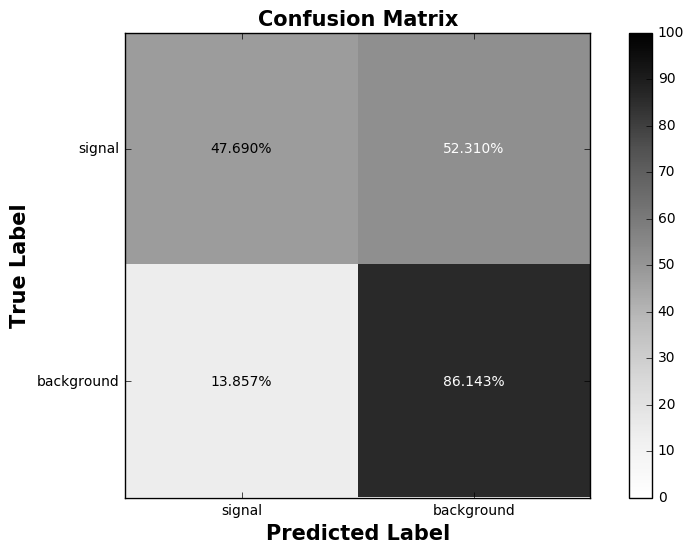

In [95]:
# confusion matrix for supervised clustering training (SVC)

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

data_labels = ['signal','background']
output_class = predi_all
choose_fold = 1

train_id, test_id = CVO[choose_fold]

cm = confusion_matrix(trgt[test_id], output_class[test_id], labels=[0,1])
cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
cm_normalized = 100.*cm

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_aspect(1)

im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Greys,clim=(0.0, 100.0))

width, height = cm_normalized.shape


for x in xrange(width):
    for y in xrange(height):
        if cm_normalized[x][y] < 50.:
            ax.annotate('%1.3f%%'%(cm_normalized[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
        else:
            ax.annotate('%1.3f%%'%(cm_normalized[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='white')

ax.set_title('Confusion Matrix',fontweight='bold',fontsize=15)
fig.colorbar(im)

tick_marks = np.arange(len(data_labels))
ax.xaxis.set_ticks(tick_marks)
ax.xaxis.set_ticklabels(data_labels)

ax.yaxis.set_ticks(tick_marks)
ax.yaxis.set_ticklabels(data_labels)

ax.set_ylabel('True Label',fontweight='bold',fontsize=15)
ax.set_xlabel('Predicted Label',fontweight='bold',fontsize=15)
fig.savefig(save_plots+'/'+'PtRel_confusionMatrixSVC_gamma='+str(gamma)+'_acc='+str('%f' % acc_score)+'.pdf')